In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Загрузка данных Iris
iris = load_iris()
X = iris.data  # Признаки: длина и ширина чашелистиков и лепестков
y = iris.target  # Целевая переменная (классы цветов)

# Разделение данных на обучающую и тестовую выборки (80% обучение, 20% тест)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Создание и обучение модели логистической регрессии для многоклассовой классификации
model_multinomial = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model_multinomial.fit(X_train, y_train)

# Предсказание на тестовой выборке
y_pred_multinomial = model_multinomial.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Оценка точности модели
accuracy = accuracy_score(y_test, y_pred_multinomial)
print("Точность модели:", accuracy)

Точность модели: 1.0


In [ ]:
# Вывод отчета по классификации для детальной оценки модели
print("\nОтчет по классификации:")
print(classification_report(y_test, y_pred_multinomial, target_names=iris.target_names))


Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



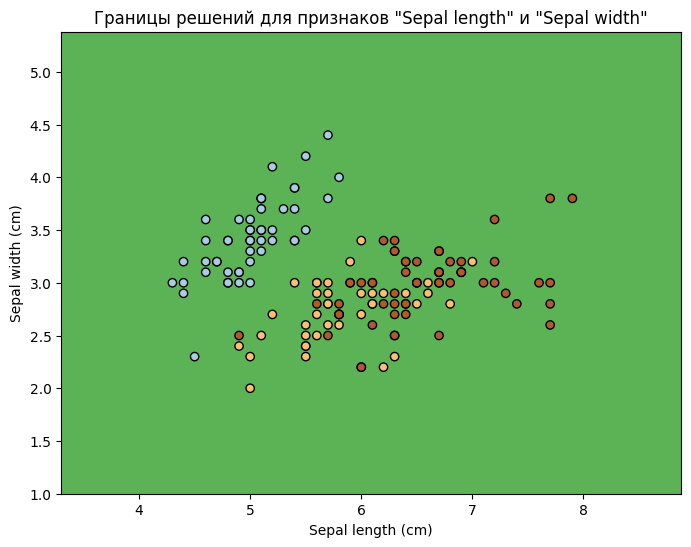

In [ ]:
# Создаем сетку для отображения границ решений (визуализация по первым двум признакам: длина и ширина чашелистиков)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1  # Диапазон для признака 'Sepal length'
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1  # Диапазон для признака 'Sepal width'
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))

# Предсказание классов для каждой точки на сетке (используем только первые два признака)
Z = model_multinomial.predict(np.c_[xx.ravel(), yy.ravel(),
                                    np.zeros_like(xx.ravel()),  # Для третьего признака 'Petal length'
                                    np.zeros_like(xx.ravel())])  # Для четвертого признака 'Petal width'

# Преобразуем результат в форму сетки
Z = Z.reshape(xx.shape)

# Визуализация границ решений
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.Paired)  # Отображаем зоны решений

# Отображаем исходные точки данных
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length (cm)')  # Ось X: длина чашелистика
plt.ylabel('Sepal width (cm)')   # Ось Y: ширина чашелистика
plt.title('Границы решений для признаков "Sepal length" и "Sepal width"')
plt.show()